In [78]:
import pandas as pd
import numpy as np
import statistics as s
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import time

# Load in the DataFrame

In [2]:
all_data = pd.read_csv("profiles.csv")
all_data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


# Augment Data

In [77]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
all_data["drinks_code"] = all_data.drinks.map(drink_mapping)
smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "yes": 3, "trying to quit": 4}
all_data["smokes_code"] = all_data.smokes.map(smokes_mapping)
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
all_data["drugs_code"] = all_data.drugs.map(drugs_mapping)
orientation_mapping = {'straight': 0, 'gay': 1, 'bisexual': 2 }
all_data['orientation_code'] = all_data.orientation.map(orientation_mapping)
sex_mapping = {'m': 0, 'f': 1}
all_data['sex_code'] = all_data.sex.map(sex_mapping)
education_mapping = {'graduated from college/university': 0, 'graduated from masters program': 1, 'working on college/university': 0, 'working on masters program': 1,\
                     'graduated from two-year college': 0, 'graduated from high school':2, 'graduated from ph.d program': 3, 'graduated from law school': 4,\
                     'working on two-year college': 0, 'dropped out of college/university': 0, 'working on ph.d program': 3, 'college/university':0,\
                     'working on space camp':5, 'working on law school':4, 'two-year college':0,'working on med school': 6, 'dropped out of high school':2,\
                     'graduated from space camp': 5, 'dropped out of space camp':5, 'graduated from med school': 6, 'dropped out of two-year college':0,\
                     'dropped out of masters program':1, 'masters program':1, 'dropped out of ph.d program':3, 'high school':2,'working on high school':2,\
                     'space camp':5, 'ph.d program':3, 'law school':4, 'dropped out of law school':4, 'dropped out of med school':6, 'med school':6\
                    }
all_data['education_code'] = all_data.education.map(education_mapping)

## Removing the NaNs and Combining the essays

In [5]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

# Removing the NaNs
all_essays = all_data[essay_cols].replace(np.nan, '', regex=True)

# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
all_data["essay_len"] = all_essays.apply(lambda x: len(x))

def avg_word_length(x):
    avgwordlength = []
    for i in x.split():
        avgwordlength.append(len(i))
    if len(avgwordlength) == 0:
        return 0
    else:
        return sum(avgwordlength)/len(avgwordlength)
all_data["avg_word_length"] = all_essays.apply(lambda x: avg_word_length(x))
all_data["i_me_frequency"] = all_essays.apply(lambda x: x.count(' i ')+x.count(' me '))

def text_word_counts(x):
    text_word_counts = []
    for i in x.split():
        text_word_counts.append(i)
    if len(text_word_counts) == 0:
        return 0
    else:
        return len(text_word_counts)
all_data['text_word_counts'] = all_essays.apply(lambda x: text_word_counts(x))

all_data2 = all_data.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', "essay8","essay9"], axis=1)
all_data_dropna = all_data2.dropna()
all_data_dropna = all_data_dropna.reset_index()

# Normalize your Data

In [6]:
feature_data= all_data2[['essay_len', 'age']]
feature_data2 = all_data2[['income', 'essay_len', 'avg_word_length', 'age']]
feature_data3 = all_data2[['age','i_me_frequency', 'avg_word_length']]

feature_data_dropna = feature_data.dropna()
feature_data_dropna = feature_data_dropna[(feature_data_dropna['essay_len']<40000) & (feature_data_dropna['age']<100)]
feature_data_dropna = feature_data_dropna.reset_index()
feature_data2_dropna = feature_data2.dropna()
feature_data2_dropna = feature_data2_dropna[(feature_data2_dropna['income']>0) & (feature_data2_dropna['income']<1000000) & (feature_data2_dropna['essay_len']<50000) & (feature_data2_dropna['avg_word_length']<20) & (feature_data_dropna['age']<100)]
feature_data2_dropna = feature_data2_dropna.reset_index()
feature_data3_dropna = feature_data3.dropna()
feature_data3_dropna = feature_data3_dropna[(feature_data3_dropna['i_me_frequency']>0) & (feature_data3_dropna['i_me_frequency']<100) & (feature_data3_dropna['avg_word_length']<20) & (feature_data3_dropna['age']<100)]
feature_data3_dropna = feature_data3_dropna.reset_index()

x = feature_data_dropna['essay_len'].values                                                                                        
x2 = feature_data2_dropna[['essay_len', 'avg_word_length', 'age']].values
x3 = feature_data3_dropna[['i_me_frequency', 'avg_word_length']].values

In [7]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
x2_scaled = min_max_scaler.fit_transform(x2)
x3_scaled = min_max_scaler.fit_transform(x3)

feature_data_scaler = pd.DataFrame(x_scaled, columns=['essay_len'])
feature_data_scaler['age'] = feature_data_dropna['age']

feature_data_scaler2 = pd.DataFrame(x2_scaled, columns=['essay_len', 'avg_word_length', 'age'])
feature_data_scaler2['income'] = feature_data2_dropna['income']

feature_data_scaler3 = pd.DataFrame(x3_scaled, columns=['i_me_frequency', 'avg_word_length'])
feature_data_scaler3['age'] = feature_data3_dropna['age']

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Regression

## Linear Regression (one variable)

Coef: [15.4679879]
Train score: 0.007054677978419632
Test score: 0.003818086793396125


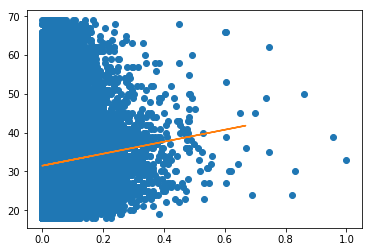

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = feature_data_scaler['age']
x = feature_data_scaler[['essay_len']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=2)

mlr = LinearRegression()
model = mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

print("Coef:", mlr.coef_)
print("Train score:", mlr.score(x_train, y_train))
print("Test score:", mlr.score(x_test, y_test))
plt.plot(x, y, 'o')
plt.plot(x_test, y_predict)
plt.show()

## KNN Regression (one variable)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

KNNregressor = KNeighborsRegressor(n_neighbors = 15, weights = "distance")
KNNregressor.fit(x_train, y_train)

KNN_y_predict = KNNregressor.predict(x_test)

print("Train score:", KNNregressor.score(x_train, y_train))
print("Test score:", KNNregressor.score(x_test, y_test))

Train score: 0.15419676268577398
Test score: -0.13772178536996926


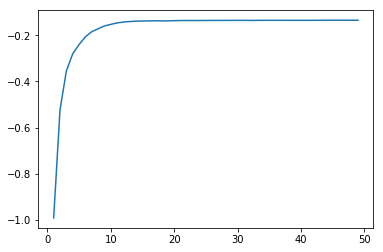

In [17]:
scores = []
for k in range(1, 50):
    KNNregressor = KNeighborsRegressor(n_neighbors = k, weights = "distance")
    KNNregressor.fit(x_train, y_train)
    scores.append(KNNregressor.score(x_test, y_test))

plt.plot(range(1,50), scores)
plt.show()

## Linear Regression (multi. variable).1

In [36]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y2 = feature_data_scaler2['income']
x2 = feature_data_scaler2[['essay_len', 'avg_word_length']]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8, test_size = 0.2, random_state=2)

mlr2 = LinearRegression()
model2 = mlr2.fit(x2_train, y2_train)

y2_predict = mlr2.predict(x2_test)

print("Coef:", mlr2.coef_)
print("Train score:", mlr2.score(x2_train, y2_train))
print("Test score:", mlr2.score(x2_test, y2_test))
%time model2 = mlr2.fit(x2_train, y2_train)

Coef: [-21251.53581395  -9585.39087694]
Train score: 0.0010927900434076765
Test score: -0.000344766129904972
Wall time: 1 ms


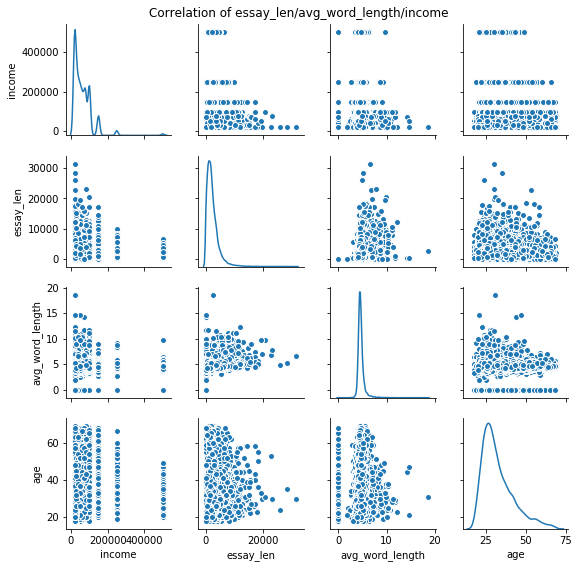

In [19]:
corr_data = feature_data2_dropna[['income', 'essay_len', 'avg_word_length', 'age']]
graph = sns.pairplot(corr_data, diag_kind='kde', size=2)
plt.subplots_adjust(top=0.95)
graph.fig.suptitle('Correlation of essay_len/avg_word_length/income')
plt.show()

## KNN Regression (multi. variable).1

In [35]:
from sklearn.neighbors import KNeighborsRegressor

KNNregressor = KNeighborsRegressor(n_neighbors = 25, weights = "distance")
KNNregressor.fit(x2_train, y2_train)

KNN_y_predict = KNNregressor.predict(x2_test)

print("Train score:", KNNregressor.score(x2_train, y2_train))
print("Test score:", KNNregressor.score(x2_test, y2_test))
%time KNNregressor.fit(x2_train, y2_train)

Train score: 0.9453892932161091
Test score: -0.0929457193575669
Wall time: 6.99 ms


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=25, p=2,
          weights='distance')

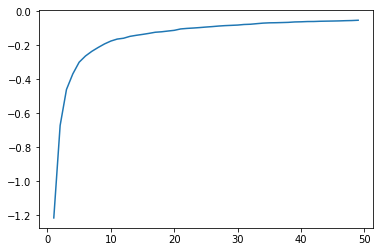

In [23]:
scores = []
for k in range(1, 50):
    KNNregressor = KNeighborsRegressor(n_neighbors = k, weights = "distance")
    KNNregressor.fit(x2_train, y2_train)
    scores.append(KNNregressor.score(x2_test, y2_test))

plt.plot(range(1,50), scores)
plt.show()

In [ ]:
residuals = y2_predict - y2_test
plt.scatter(y2_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
plt.show()

## Linear Regression (multi. variable).2

In [25]:
y3 = feature_data_scaler3['age']
x3 = feature_data_scaler3[['i_me_frequency', 'avg_word_length']]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size = 0.8, test_size = 0.2, random_state=6)

mlr3 = LinearRegression()
model3 = mlr.fit(x3_train, y3_train)
y3_predict = mlr.predict(x3_test)

print("Coef:", mlr.coef_)
print("Train score:", mlr.score(x3_train, y3_train))
print("Test score:", mlr.score(x3_test, y3_test))

%time mlr.fit(x3_train, y3_train)

Coef: [4.84002858 7.06925508]
Train score: 0.004090228320921985
Test score: 0.003689078825278469
Wall time: 2 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

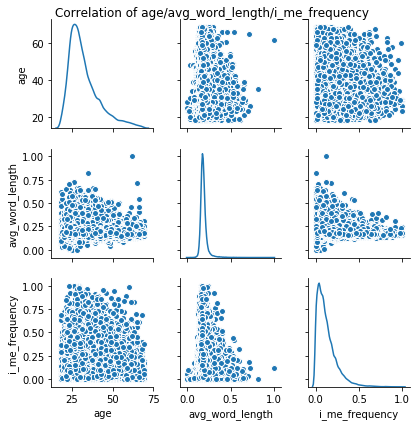

In [33]:
corr_data = feature_data_scaler3[['age', 'avg_word_length', 'i_me_frequency']]
graph = sns.pairplot(corr_data, diag_kind='kde', size=2)
#plt.figure(figsize = [12,4])
plt.subplots_adjust(top=0.95)
graph.fig.suptitle('Correlation of age/avg_word_length/i_me_frequency')
plt.show()

## KNN Regression  (multi. variable).2

In [34]:
KNNregressor = KNeighborsRegressor(n_neighbors = 10, weights = "distance")
KNNregressor.fit(x3_train, y3_train)

KNN_y_predict = KNNregressor.predict(x3_test)

print("Train score:", KNNregressor.score(x3_train, y3_train))
print("Test score:", KNNregressor.score(x3_test, y3_test))
%time KNNregressor.fit(x3_train, y3_train)

Train score: 0.9569463253445207
Test score: -0.2878803112315589
Wall time: 31.2 ms


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

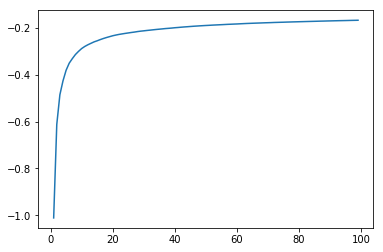

In [29]:
scores = []
for k in range(1,100):
    KNNregressor = KNeighborsRegressor(n_neighbors = k, weights = "distance")
    KNNregressor.fit(x3_train, y3_train)
    scores.append(KNNregressor.score(x3_test, y3_test))

plt.plot(range(1,100),scores)
plt.show()

# Classification

## K-Nearest

Accuracy Score: 0.71256374594344
Accuracy Score: 0.7305819615117087


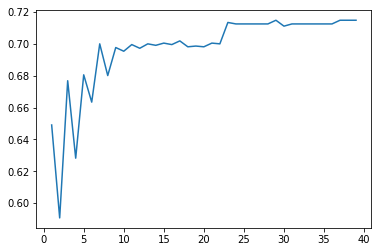

Wall time: 25 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=39, p=2,
           weights='uniform')

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

KN_features = all_data[['sex', 'education_code', 'income', 'text_word_counts', 'sex_code']]
KN_features_dropna = KN_features.dropna()
KN_features_dropna_drop_1 = KN_features_dropna[KN_features_dropna['income']>0]
KN_features_dropna = KN_features_dropna.reset_index()
KN_features_dropna_drop_1 = KN_features_dropna_drop_1.reset_index()

KN_x = KN_features_dropna_drop_1[['education_code', 'income']]
KN_y = KN_features_dropna_drop_1['sex']
scaled_data = scale(KN_x, axis = 0)

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, KN_y, train_size = 0.8, test_size = 0.2, random_state=6)

classifier = KNeighborsClassifier(n_neighbors = 25)
classifier.fit(train_data, train_labels)

print('Accuracy Score:', classifier.score(test_data, test_labels))
print('Accuracy Score:', classifier.score(train_data, train_labels))


scores = []
for k in range(1, 40):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))

plt.plot(range(1,40), scores)
plt.show()
%time classifier.fit(train_data, train_labels)

## Support Vector Machines

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

SVM_features = all_data[['sex', 'education_code', 'income', 'text_word_counts', 'sex_code']]
SVM_features_dropna = KN_features.dropna()
SVM_features_dropna_drop_1 = KN_features_dropna[KN_features_dropna['income']>0]
SVM_features_dropna = KN_features_dropna.reset_index()
SVM_features_dropna_drop_1 = KN_features_dropna_drop_1.reset_index()

SVM_x = SVM_features_dropna_drop_1[['education_code', 'income']]
SVM_y = SVM_features_dropna_drop_1['sex']
scaled_x = scale(SVM_x, axis = 0)

train_data, test_data, train_labels, test_labels = train_test_split(scaled_x, SVM_y, train_size = 0.8, test_size = 0.2, random_state=6)

SVM_classifier = SVC(kernel = 'linear')
SVM_classifier.fit(train_data, train_labels)

SVP_predict_y = SVM_classifier.predict(test_data)

print('Accuracy Score:', SVM_classifier.score(train_data, train_labels))
print('Accuracy Score:', SVM_classifier.score(test_data, test_labels))

%time SVM_classifier.fit(train_data, train_labels)

Accuracy Score: 0.7279156039879434
Accuracy Score: 0.7130273528048215
Wall time: 773 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

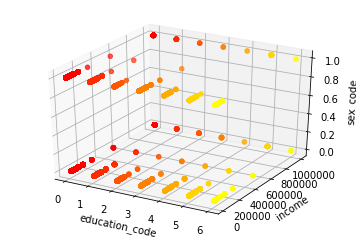

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

px = SVM_features_dropna_drop_1['education_code']
py = SVM_features_dropna_drop_1['income']
pz = SVM_features_dropna_drop_1['sex_code']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(px, py, pz, c=px, cmap='autumn')
ax.set_xlabel('education_code')
ax.set_ylabel('income')
ax.set_zlabel('sex_code')
plt.show()